In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import random

# Import data

In [2]:
# file path to data folder
path = './Output'

In [3]:
file = path + f'/combined_data.csv'
data = pd.read_csv(file, index_col=0).fillna(pd.NA)

In [4]:
temp = data.copy()

n_days, n_cols = temp.shape
variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

for day in range(n_days):
    for variable in variables:
        time_series = np.array([value if value != 'None' else None for value in temp[variable][day].split(',')], dtype=float)

        temp[variable][day] = len(time_series)

temp

C:\Users\jjung\AppData\Local\Temp\ipykernel_35056\3810927935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[variable][day] = len(time_series)


,subjectID,date,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,GalvanicSkinResponse,HR,HRV,...,Steps,SkinTemperature,ActivityClass,timezone,VAS,phF,MF,ReIP,sport,n_answers
0,1,14.03.19,562,562,562,562,562,562,562,562,...,562,562,562,UTC,0.0,0.0,1.0,-1.0,0.0,1
1,1,15.03.19,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,UTC,0.0,1.0,1.0,1.0,1.0,1
2,1,16.03.19,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,UTC,0.0,0.0,0.0,0.0,0.0,1
3,1,17.03.19,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,UTC,0.0,1.0,0.0,0.0,1.0,1
4,1,18.03.19,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,UTC,0.0,1.0,0.0,-1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,27,24.08.18,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,CEST,0.0,1.0,1.0,0.0,NaN,2
406,27,26.08.18,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,CEST,0.0,1.0,0.0,1.0,NaN,1
407,27,27.08.18,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,CEST,0.0,1.0,0.0,1.0,NaN,1
408,27,28.08.18,1440,1440,1440,1440,1440,1440,1440,1440,...,1440,1440,1440,CEST,0.0,0.0,0.0,1.0,NaN,1


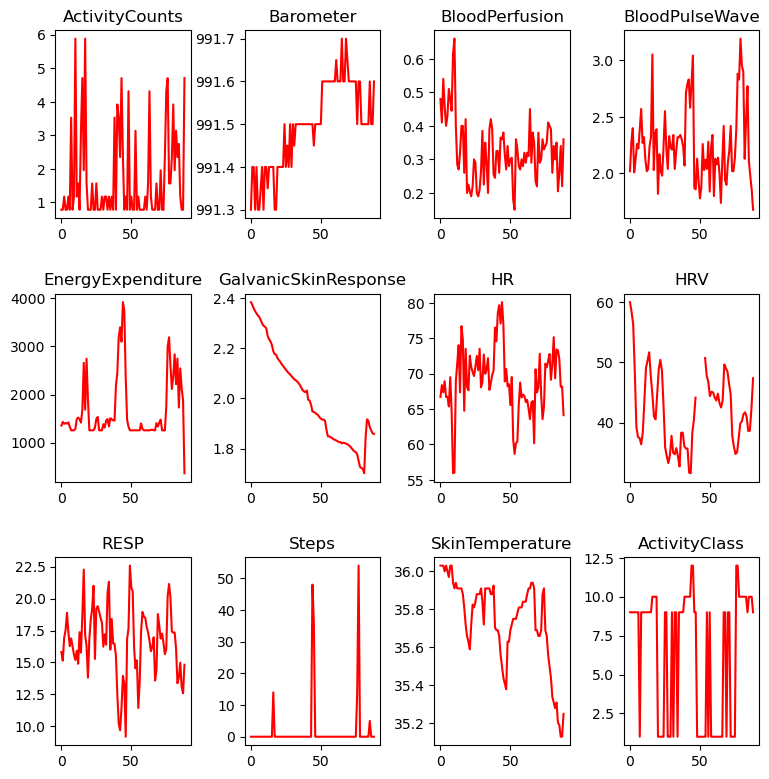

In [5]:
def plotter(figure, day):
    variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
                 'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
                 'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

    plt.subplots_adjust(left=0.1,
                        bottom=0.01,
                        right=1.2,
                        top=1.5,
                        wspace=0.4,
                        hspace=0.4)
    length = len(np.array([value if value != 'None' else None for value in data['HR'][day].split(',')], dtype=float))
    for i, variable in enumerate(variables):
        time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)

        assert len(time_series) == length, 'time-series data lengths differ!'

        col = 'green' if data['VAS'][day] == 0.0 else 'red'
        plt.subplot(3, 4, i+1)
        plt.title(variable)
        plt.plot(time_series, col)

fig = plt.figure()
day = 357
plotter(fig, day)

In [6]:
query = '''
SELECT COUNT(*)
FROM temp
WHERE ActivityCounts <=  1152;'''
sqldf(query)

,COUNT(*)
0,30


Visualization: plot random day of dataset (<span style="color:red">fatigued</span>, <span style="color:green">vigilant</span>)

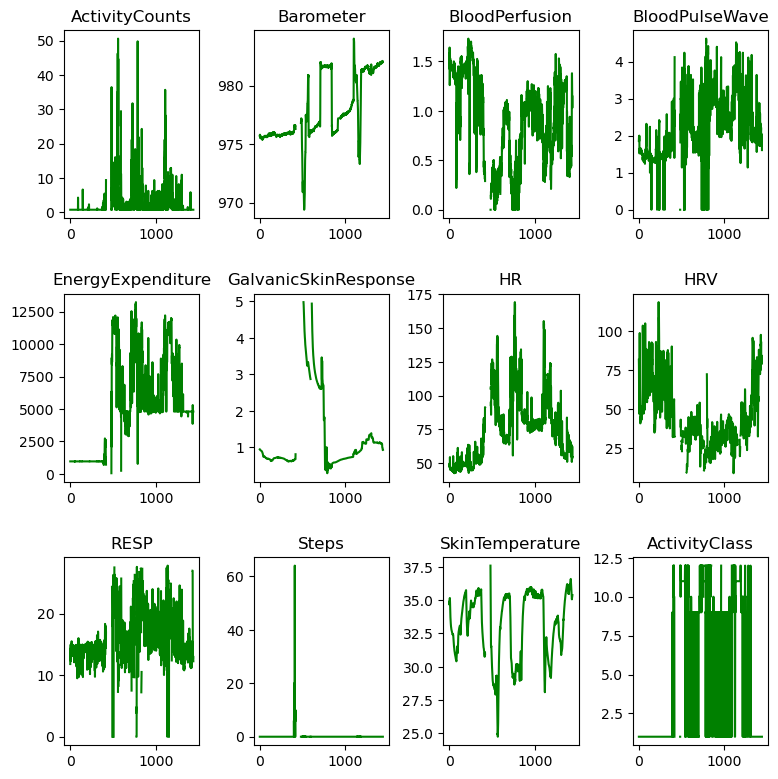

In [7]:
def plotter(figure, day):
    variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
                 'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
                 'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

    plt.subplots_adjust(left=0.1,
                        bottom=0.01,
                        right=1.2,
                        top=1.5,
                        wspace=0.4,
                        hspace=0.4)
    length = len(np.array([value if value != 'None' else None for value in data['HR'][day].split(',')], dtype=float))
    for i, variable in enumerate(variables):
        time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)

        assert len(time_series) == length, 'time-series data lengths differ!'

        col = 'green' if data['VAS'][day] == 0.0 else 'red'
        plt.subplot(3, 4, i+1)
        plt.title(variable)
        plt.plot(time_series, col)

fig = plt.figure()
day = random.sample(range(data.shape[0]), 1)[0]
plotter(fig, day)

# Filter data

In [8]:
print('Total days before filtering:', data.shape[0])

Total days before filtering: 410


In [9]:
# exclude days with >80% of data missing
THRESHOLD = 0.8
n_days, n_cols = data.shape
variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

# flag deficient rows
data.insert(n_cols, "deficient", [False for i in range(n_days)], True)
for day in range(n_days):
    for variable in variables:
        time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)

        missing_data = np.mean(np.where(np.isnan(time_series), 1.0, 0.0))
        if missing_data > THRESHOLD:
            data['deficient'][day] = True

# remove deficient rows
query = '''
SELECT *
FROM data
WHERE deficient = 0;'''
data = sqldf(query)
data = data.drop(columns=['deficient']) # deficiency column is no longer required

C:\Users\jjung\AppData\Local\Temp\ipykernel_35056\668791904.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['deficient'][day] = True


In [10]:
THRESHOLD = 0.8
test = data.copy()
n_days, n_cols = test.shape
variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

# flag deficient rows
test.insert(n_cols, "deficient", [False for i in range(n_days)], True)
for day in range(n_days):
    for variable in variables:
        time_series = np.array([value if value != 'None' else None for value in test[variable][day].split(',')], dtype=float)

        '''missing_data = np.mean(np.where(np.isnan(time_series), 1.0, 0.0))
        if missing_data > THRESHOLD:
            test['deficient'][day] = True'''
        data_length = np.sum(np.where(np.isnan(time_series), 0.0, 1.0))
        if data_length < THRESHOLD * 24 * 60:
            test['deficient'][day] = True
        #test[variable][day] = data_length

# remove deficient rows
query = '''
SELECT *
FROM test
WHERE deficient = 0;'''
test = sqldf(query)
#test = data.drop(columns=['deficient']) # deficiency column is no longer required
test

C:\Users\jjung\AppData\Local\Temp\ipykernel_35056\3131665789.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['deficient'][day] = True


,subjectID,date,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,GalvanicSkinResponse,HR,HRV,...,SkinTemperature,ActivityClass,timezone,VAS,phF,MF,ReIP,sport,n_answers,deficient
0,23,01.02.18,"0.784313725,0.784313725,0.784313725,0.78431372...","975.7,975.7,975.7,975.6,975.7,975.7,975.7,975....","0.59,0.57,0.53,0.5,0.55,0.53,0.625,0.66,0.6,0....","3.3,3.29,3.2,3.02,3.12,3.08,3.0,2.94,2.82,3.02...","960.0,960.0,960.0,960.0,960.0,960.0,960.0,960....","1.61975,1.613955556,1.611683333,1.610822222,1....","51.10281304,51.60327148,51.56562889,51.9514778...","41.36766153,37.5,35.03333333,34.0,33.9829303,3...",...,"36.16,36.22,36.25,36.28,36.28,36.31,36.38,36.4...","1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",CET,1.0,1.0,1.0,1.0,None,1,0
1,23,02.01.18,"1.568627451,0.784313725,1.568627451,0.78431372...","997.6,997.6,997.7,997.6,997.7,997.7,997.6,997....","0.775,0.81,0.69,0.38,0.525,0.71,0.75,0.77,0.72...","2.72,2.74,2.72,3.0,3.86,4.02,4.08,3.93,3.28,3....","960.0,942.0,720.0,1222.0,1097.0,960.0,960.0,96...","2.516494444,2.502794444,2.490383333,2.47836666...","61.88211485,62.59777898,65.09791196,75.9731398...","33.52402402,33.06666667,36.07876414,51.95,61.1...",...,"34.19,34.28,34.34,34.34,34.13,34.13,34.09,34.3...","1.0,1.0,9.0,None,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1...",CET,1.0,1.0,1.0,-1.0,None,1,0
2,23,03.02.18,"None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...",...,"None,None,None,None,None,None,None,None,None,N...","None,None,None,None,None,None,None,None,None,N...",CET,0.0,1.0,0.0,1.0,None,1,0
3,23,05.01.18,"0.784313725,0.784313725,0.784313725,0.78431372...","974.4,974.5,974.5,974.5,974.4,974.5,974.5,974....","0.46,0.45,0.48,0.56,0.42,0.5,0.68,0.47,0.42,0....","2.36,2.38,2.2,2.26,2.72,2.16,2.16,2.9,2.34,2.2...","960.0,960.0,960.0,960.0,960.0,960.0,960.0,960....","2.9455,2.932344444,2.921,2.908911111,2.8994888...","56.21378955,57.09264458,57.23455132,59.6960025...","58.33333333,62.0,66.88333333,69.05,70.55,71.78...",...,"34.19,34.19,34.22,34.25,34.25,34.0,33.91,33.81...","1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",CET,1.0,1.0,1.0,0.0,None,1,0
4,23,06.01.18,"0.784313725,0.784313725,0.784313725,0.78431372...","976.0,976.0,976.0,975.95,976.0,975.9,975.9,975...","0.41,0.46,0.44,0.44,0.39,0.48,0.53,0.58,0.45,0...","2.86,2.92,3.08,2.72,3.16,2.84,2.76,2.7,1.4,2.9...","960.0,960.0,960.0,960.0,960.0,960.0,960.0,970....","1.639483333,1.637816667,1.637883333,1.63672777...","49.7483731,48.14655423,48.09902011,50.32858069...","95.58333333,104.7166667,93.73333333,86.5333333...",...,"35.59,35.5,35.41,35.34,35.25,35.06,34.97,35.19...","1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",CET,1.0,1.0,1.0,1.0,None,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,26,28.01.18,"0.784313725,0.784313725,0.784313725,0.78431372...","1005.1,1005.0,1005.1,1005.1,1005.05,1005.1,100...","0.83,0.82,0.8,0.815,0.84,0.865,0.785,0.77,0.85...","1.96,2.0,1.94,2.04,1.88,1.92,1.98,1.92,1.8,1.8...","960.0,960.0,960.0,960.0,960.0,960.0,960.0,960....","2.234005556,2.219355556,2.205,2.191105556,2.17...","48.83667906,47.7383781,47.32818044,47.8381026,...","58.88333333,53.99946121,58.21666667,64.9833333...",...,"36.28,36.28,36.325,36.38,36.41,36.455,36.5,36....","1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1....",CET,1.0,1.0,1.0,1.0,None,1,0
107,26,28.02.18,"0.784313725,0.784313725,3.137254902,1.17647058...","984.6,984.7,984.5,984.5,984.45,984.4,984.4,984...","None,None,0.13,0.13,0.17,0.18,0.19,0.16,0.16,0...","None,None,2.38,1.75,2.32,2.18,2.74,2.12,2.46,2...","2491.141706,1328.89823,2093.385481,1202.641182...","None,None,None,None,None,Non

In [11]:
print(f'Total excluded days (>{THRESHOLD * 100}% missing data):', n_days - data.shape[0])
print('Total remaining days:', data.shape[0])

Total excluded days (>80.0% missing data): 0
Total remaining days: 318


# Imputation

(0.0, 1440.0)

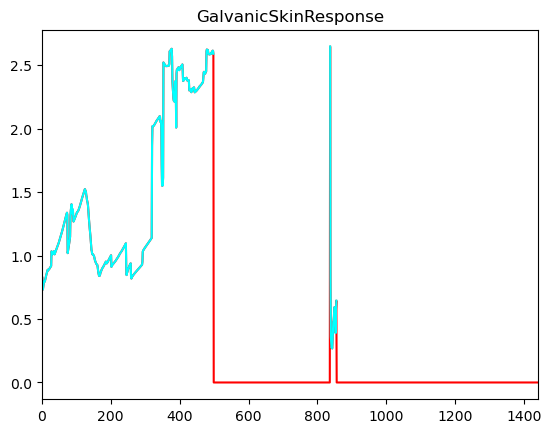

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

#imp_mean = IterativeImputer(random_state=0)
imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='constant', fill_value=0.0)






# test on random day
day = random.sample(range(data.shape[0]), 1)[0]
variable = random.sample(variables, 1)[0]

# plot imputed data
time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)
time_series_imputed = np.transpose(imputer.fit_transform([time_series]))
length = len(time_series)

plt.title(variable)
#plt.subplot(1, 2, 1)
plt.plot(time_series_imputed, color='red')
#plt.xlim(0, length)

# plot unchanged data on top
#plt.subplot(1, 2, 2)
plt.plot(time_series, color='aqua')
plt.xlim(0, length)

In [14]:
# total amount of data left
test = data.copy()
n_days, n_cols = test.shape
variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

total_data = 0
for day in range(n_days):
    for variable in variables:
        time_series = np.array([value if value != 'None' else None for value in test[variable][day].split(',')], dtype=float)

        total_data += np.sum(np.where(np.isnan(time_series), 0.0, 1.0))

total_data

4389809.0

In [31]:
# check NA sequence lengths
test = data.copy()
n_days, n_cols = test.shape
variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
             'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
             'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

na_sequences_data = []
for day in range(n_days):
    for variable in variables:
        time_series = np.array([value if value != 'None' else None for value in test[variable][day].split(',')], dtype=float)

        na_sequences = []
        na_seq = 0
        for datapoint in time_series:
            if not np.isnan(datapoint):
                if na_seq > 0:
                    na_sequences.append(na_seq)
                    na_seq = 0
            else:
                # datapoint is NA
                na_seq += 1
        '''if len(na_sequences) > 0:
            print(day, variable, na_sequences)'''
        '''print(day, variable, na_sequences)'''
        na_sequences_data += na_sequences

In [39]:
np.array(na_sequences_data)

array([3, 3, 1, ..., 1, 1, 3])

In [38]:
np.unique(np.array(na_sequences_data))

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [41]:
print(min(np.unique(np.array(na_sequences_data))), max(np.unique(np.array(na_sequences_data))))

1 1076


(array([1.4366e+04, 1.7000e+03, 9.3500e+02, 6.3600e+02, 7.6500e+02,
        4.1200e+02, 3.1700e+02, 2.7900e+02, 3.6700e+02, 1.9300e+02,
        1.9100e+02, 1.7700e+02, 1.8800e+02, 8.1000e+01, 1.0000e+02,
        7.6000e+01, 1.3800e+02, 9.4000e+01, 7.8000e+01, 8.0000e+01,
        8.2000e+01, 7.8000e+01, 6.4000e+01, 8.1000e+01, 7.8000e+01,
        9.3000e+01, 6.9000e+01, 6.2000e+01, 1.5700e+02, 9.9000e+01,
        4.6000e+01, 6.7000e+01, 1.0700e+02, 6.0000e+01, 5.2000e+01,
        6.5000e+01, 1.1600e+02, 5.6000e+01, 3.4000e+01, 9.9000e+01,
        1.0000e+02, 6.9000e+01, 7.5000e+01, 5.4000e+01, 5.0000e+01,
        5.3000e+01, 5.6000e+01, 4.7000e+01, 7.8000e+01, 4.6000e+01,
        7.4000e+01, 6.3000e+01, 4.2000e+01, 3.5000e+01, 3.7000e+01,
        2.6000e+01, 2.8000e+01, 2.3000e+01, 3.2000e+01, 1.3000e+01,
        4.1000e+01, 2.1000e+01, 3.0000e+01, 3.3000e+01, 4.0000e+01,
        1.8000e+01, 2.2000e+01, 1.3000e+01, 2.6000e+01, 2.4000e+01,
        1.9000e+01, 2.5000e+01, 3.0000e+01, 6.00

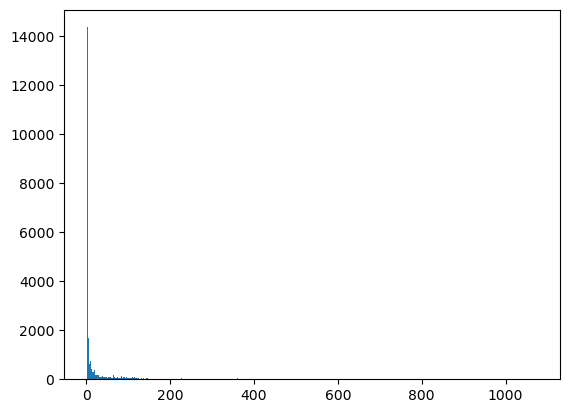

In [40]:
plt.hist(na_sequences_data, bins=len(np.unique(np.array(na_sequences_data))))

In [48]:
test2 = pd.DataFrame(np.array(na_sequences_data), columns=['n'])

query = '''
SELECT n, COUNT(*)
FROM test2
GROUP BY n
ORDER BY COUNT(*) DESC'''
sqldf(query)

,n,COUNT(*)
0,1,9182
1,2,3585
2,3,1599
3,4,1001
4,5,699
...,...,...
473,202,1
474,197,1
475,194,1
476,183,1


In [28]:
np.array([value if value != 'None' else None for value in test['ActivityCounts'][0].split(',')], dtype=float)

array([ 1.17647059,  1.17647059,  1.17647059,  1.17647059,  0.78431372,
        1.17647059,  5.88235294,         nan,         nan,         nan,
        9.01960784,  6.66666667,  2.74509804, 17.64705882,  3.1372549 ,
        1.17647059,  3.1372549 ,  0.78431372,  0.78431372,  0.78431372,
        1.17647059,  1.17647059,  0.78431372,  0.78431372,  0.78431372,
        1.56862745,  0.78431372,  0.78431372,  8.23529412,  2.35294118,
        2.35294118,  1.17647059,  0.78431372,  0.78431372,  0.78431372,
        0.78431372,  0.78431372,  0.78431372,  1.17647059,  0.78431372,
        0.78431372,  1.56862745,  1.17647059,  1.56862745,  0.78431372,
        0.78431372,  1.17647059,  1.17647059,  0.78431372,  1.17647059,
        0.78431372,  4.31372549,  2.35294118,  2.35294118,  0.78431372,
        1.17647059,  0.78431372,  0.78431372,  0.78431372,  0.78431372,
        0.78431372,  1.17647059,  0.78431372,  3.1372549 ,  0.78431372,
        1.17647059,  1.96078431,  0.78431372,  1.96078431,  0.78

In [21]:
data['ActivityCounts'][0]

'1.176470588,1.176470588,1.176470588,1.176470588,0.784313725,1.176470588,5.882352941,None,None,None,9.019607843,6.666666667,2.745098039,17.64705882,3.137254902,1.176470588,3.137254902,0.784313725,0.784313725,0.784313725,1.176470588,1.176470588,0.784313725,0.784313725,0.784313725,1.568627451,0.784313725,0.784313725,8.235294118,2.352941176,2.352941176,1.176470588,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,1.176470588,0.784313725,0.784313725,1.568627451,1.176470588,1.568627451,0.784313725,0.784313725,1.176470588,1.176470588,0.784313725,1.176470588,0.784313725,4.31372549,2.352941176,2.352941176,0.784313725,1.176470588,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,1.176470588,0.784313725,3.137254902,0.784313725,1.176470588,1.960784314,0.784313725,1.960784314,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,0.784313725,1.176470588,1.176470588,0.784313725,1.176470588,1.568627451,0.784313725,0.784313725,0.784313725,2.352941176,0

# Segmentation

# Spectrogram conversion

C:\Users\jjung\anaconda3\envs\ai\lib\site-packages\matplotlib\axes\_axes.py:7622: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


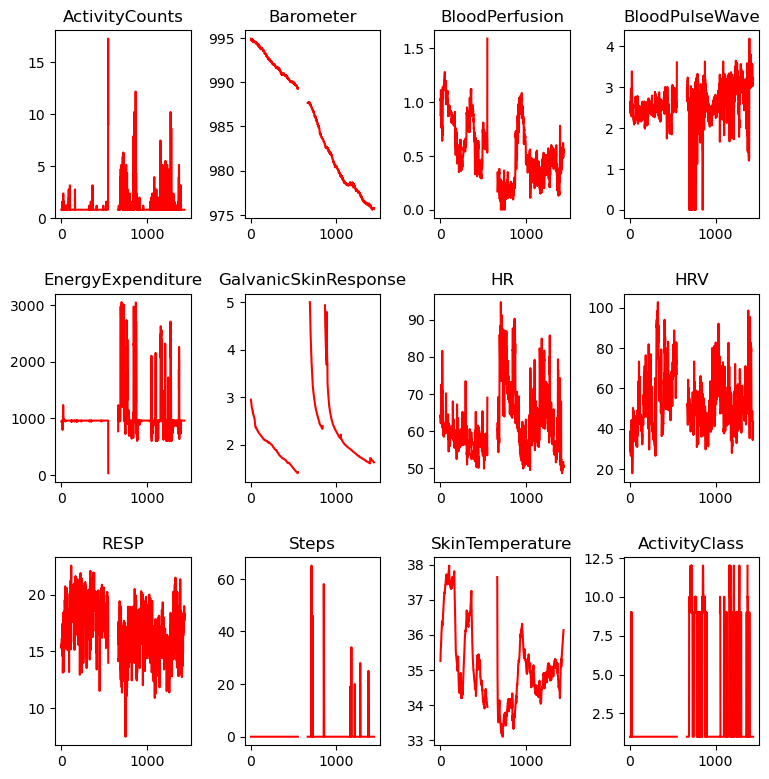

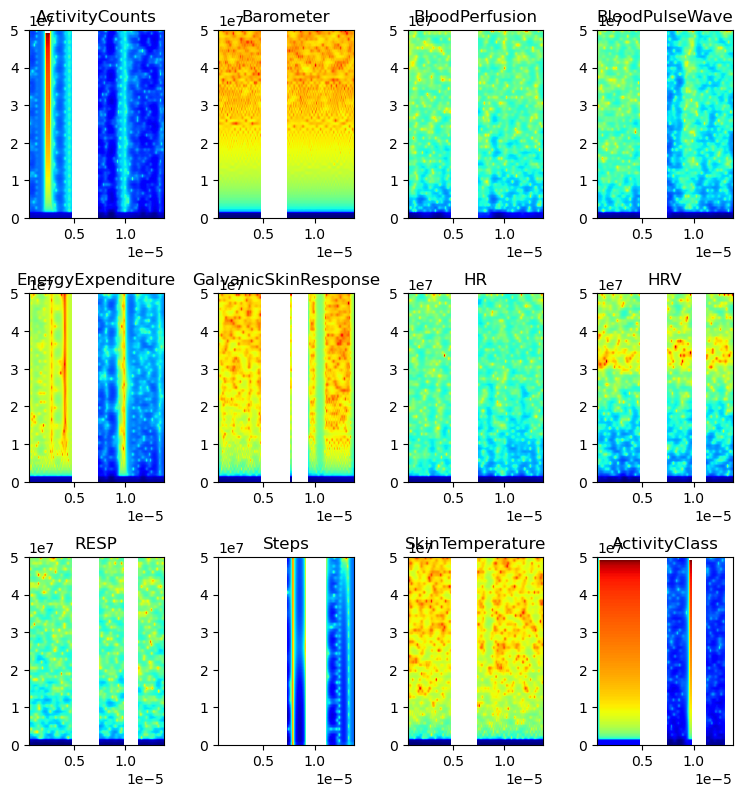

In [93]:
import random

def plotter(figure, day):
    variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
                 'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
                 'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

    plt.subplots_adjust(left=0.1,
                        bottom=0.01,
                        right=1.2,
                        top=1.5,
                        wspace=0.4,
                        hspace=0.4)
    length = len(np.array([value if value != 'None' else None for value in data['HR'][day].split(',')], dtype=float))
    for i, variable in enumerate(variables):
        time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)

        assert len(time_series) == length, 'time-series data lengths differ!'

        col = 'green' if data['VAS'][day] == 0.0 else 'red'
        plt.subplot(3, 4, i+1)
        plt.title(variable)
        plt.plot(time_series, col)

def plotter_spec(figure, day):
    variables = ['ActivityCounts', 'Barometer', 'BloodPerfusion',
                 'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR',
                 'HRV', 'RESP', 'Steps', 'SkinTemperature', 'ActivityClass']

    plt.subplots_adjust(left=0.1,
                        bottom=0.01,
                        right=1.2,
                        top=1.5,
                        wspace=0.4,
                        hspace=0.4)
    length = len(np.array([value if value != 'None' else None for value in data['HR'][day].split(',')], dtype=float))
    for i, variable in enumerate(variables):
        time_series = np.array([value if value != 'None' else None for value in data[variable][day].split(',')], dtype=float)

        assert len(time_series) == length, 'time-series data lengths differ!'

        plt.subplot(3, 4, i+1)
        plt.title(variable)

        plt.specgram(time_series, NFFT=128, Fs=10e7, noverlap=120, cmap='jet_r')

day = random.sample(range(data.shape[0]), 1)[0]

fig = plt.figure()
plotter(fig, day)

fig = plt.figure()
plotter_spec(fig, day)